In [274]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline
import statsmodels.api as sm 
import pylab as pl

In [275]:
df = pd.read_csv("../desktop/Speed Dating Data.csv") #encoding="ISO-8859-1"
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


### Data Dictionary 

The variables under consideration in this analysis are demarcated at the top, the complete data dictionary is below. 

gender:	Female=0
        Male=1
        
match:  1=yes, 
        0=no

Attributes:
(1=awful, 10=great)
    Attractive
    Sincere
    Intelligent
    Fun
    Ambitious
_______________________________________________________________________________________________

iid: 	unique subject number, group(wave id gender)

id:  	subject number within wave
        
idg: 	subject number within gender, group(id gender)

round:		number of people that met in wave

position:  	station number where met partner 

positin1:	station number where started 

order: 		the number of date that night when met partner

partner: 	partner’s id number the night of event

pid: 		partner’s iid number

int_corr:	correlation between participant’s and partner’s ratings of interests in 			Time 1

samerace:  	participant and the partner were the same race. 1= yes, 0=no

age_o:		age of partner

race_o:		race of partner

pf_o_att: 	partner’s stated preference at Time 1 (attr1_1) for all 6 attributes

dec_o: 		decision of partner the night of event

attr_o: 		rating by partner the night of the event, for all 6 attributes

age:        participants age

field:		field of study  

field_cd: 	field coded 

undergrd:  	school attended for undergraduate degree

mn_sat: 	Median SAT score for the undergraduate institution where attended.  			Taken from Barron’s 25th Edition college profile book.  Proxy for 				intelligence.

tuition: 	Tuition listed for each response to undergrad in Barron’s 25th Edition 			college profile book.

race:
	Black/African American=1
	European/Caucasian-American=2
	Latino/Hispanic American=3
	Asian/Pacific Islander/Asian-American=4
	Native American=5
	Other=6


imprace:
How important is it to you (on a scale of 1-10) that a person you date be of the same racial/ethnic background?

imprelig:
 How important is it to you (on a scale of 1-10) that a person you date be of the same religious background?

from:
Where are you from originally (before coming to Columbia)? 

zipcode:
What was the zip code of the area where you grew up? 
income:
Median household income based on zipcode using the Census Bureau website:
http://venus.census.gov/cdrom/lookup/CMD=LIST/DB=C90STF3B/LEV=ZIP 
When there is no income it means that they are either from abroad or did not enter their zip code.

goal:
What is your primary goal in participating in this event? 
	Seemed like a fun night out=1
	To meet new people=2
	To get a date=3
	Looking for a serious relationship=4
	To say I did it=5
	Other=6

date:
In general, how frequently do you go on dates? 
	Several times a week=1
	Twice a week=2
	Once a week=3
	Twice a month=4
	Once a month=5
	Several times a year=6
	Almost never=7

go out:
How often do you go out (not necessarily on dates)?
	Several times a week=1
	Twice a week=2
	Once a week=3
	Twice a month=4
	Once a month=5
	Several times a year=6
	Almost never=7

career:
What is your intended career?

career_c: career coded 
1= Lawyer 
2= Academic/Research 
3= Psychologist 
4= Doctor/Medicine 
5=Engineer 
6= Creative Arts/Entertainment 
7= Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin 
8= Real Estate 
9= International/Humanitarian Affairs 
10= Undecided 
11=Social Work
12=Speech Pathology
13=Politics
14=Pro sports/Athletics
15=Other
16=Journalism
17=Architecture


How interested are you in the following activities, on a scale of 1-10?
sports: Playing sports/ athletics
tvsports: Watching sports
excercise: Body building/exercising
dining: Dining out
museums: Museums/galleries
art: Art
hiking:  Hiking/camping
gaming: Gaming
clubbing: Dancing/clubbing
reading: Reading
tv: Watching TV
theater: Theater
movies: Movies
concerts: Going to concerts
music: Music
shopping: Shopping
yoga: Yoga/meditation

exphappy:
Overall, on a scale of 1-10, how happy do you expect to be with the people you meet 
during the speed-dating event?

expnum: 
Out of the 20 people you will meet, how many do you expect will be interested in dating you? 





In [276]:
df.head() #data summary

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [277]:
df.describe() #data summary

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,NaN,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,NaN,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,281.000000,NaN,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,NaN,8.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,407.000000,NaN,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,NaN,13.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [278]:
groupby_gender.describe() #description by gender

age        age_o          amb       amb1_1       amb1_2  \
gender                                                                          
0      count  4119.000000  4155.000000  3822.000000  4125.000000  3653.000000   
       mean     26.105851    26.621901     6.952773    12.827222    11.412737   
       std       3.683108     3.422257     1.845563     5.481803     5.206001   
       min      19.000000    18.000000     0.000000     0.000000     0.000000   
       25%            NaN          NaN          NaN          NaN          NaN   
       50%            NaN          NaN          NaN          NaN          NaN   
       75%            NaN          NaN          NaN          NaN          NaN   
       max      55.000000    42.000000    10.000000    30.000000    22.220000   
1      count  4164.000000  4119.000000  3844.000000  4154.000000  3810.000000   
       mean     26.609270    26.105851     6.603278     8.552829     8.475916   
       std       3.429930     3.683108     1.723994     5.985803     5.735530   
       min      18.000000    19.000000     0.000000     0.000000     0.000000   
       25%            NaN          NaN          NaN          NaN          NaN   
       50%            NaN          NaN          NaN          NaN          NaN   
       75%            NaN          NaN          NaN          NaN          NaN   
       max      42.000000    55.000000    10.000000    53.000000    20.000000   

                   amb1_3       amb1_s       amb2_1       amb2_2       amb2_3  \
gender                                                                          
0      count  2194.000000  2036.000000  4125.000000  2835.000000  1614.000000   
       mean     12.354964    12.398644     9.230638     9.561728     7.448575   
       std       5.505458     5.190742     5.314698     4.642280     4.521440   
       min       0.000000     0.000000     0.000000     0.000000     0.000000   
       25%            NaN          NaN          NaN          NaN          NaN   
       50%            NaN          NaN          NaN          NaN          NaN   
       75%            NaN          NaN          NaN          NaN          NaN   
       max      30.000000    21.950000    30.000000    20.000000    25.000000   
1      count  1780.000000  2060.000000  4164.000000  2940.000000  1345.000000   
       mean      9.102337     9.905204    14.234815    14.173884    12.019331   
       std       5.878005     5.545062     7.346384     6.861315     7.368666   
       min       0.000000     0.000000     0.000000     0.000000     0.000000   
       25%            NaN          NaN          NaN          NaN          NaN   
       50%            NaN          NaN          NaN          NaN          NaN   
       75%            NaN          NaN          NaN          NaN          NaN   
       max      20.000000    23.810000    50.000000    50.000000    50.000000   

                 ...           sinc7_3       sinc_o       sports      theater  \
gender           ...                                                            
0      count     ...       1114.000000  4037.000000  4125.000000  4125.000000   
       mean      ...         18.085278     7.251053     5.813333     7.481939   
       std       ...          9.625088     1.612199     2.653908     2.125540   
       min       ...          0.000000     0.000000     1.000000     1.000000   
       25%       ...               NaN          NaN          NaN          NaN   
       50%       ...               NaN          NaN          NaN          NaN   
       75%       ...               NaN          NaN          NaN          NaN   
       max       ...         60.000000    10.000000    10.000000    10.000000   
1      count     ...        902.000000  4054.000000  4174.000000  4174.000000   
       mean      ...         12.651885     7.099778     7.029947     6.078582   
       std       ...          8.010446     1.856756     2.437882     2.119044   
       min       ...          0.000000     0.000000

In [263]:
groupby_gender.corr() #correlation by gender

age     age_o       amb    amb1_1    amb1_2    amb1_3  \
gender                                                                        
0      age       1.000000  0.106928 -0.014755 -0.061372 -0.007732 -0.091722   
       age_o     0.106928  1.000000  0.022225  0.035370  0.064370  0.007863   
       amb      -0.014755  0.022225  1.000000  0.135094  0.088821  0.127097   
       amb1_1   -0.061372  0.035370  0.135094  1.000000  0.658584  0.662754   
       amb1_2   -0.007732  0.064370  0.088821  0.658584  1.000000  0.701775   
       amb1_3   -0.091722  0.007863  0.127097  0.662754  0.701775  1.000000   
       amb1_s   -0.128128 -0.031394  0.168519  0.631139  0.692448  0.651776   
       amb2_1   -0.077366  0.046041  0.101792  0.427781  0.419237  0.408001   
       amb2_2   -0.145793  0.043639  0.144042  0.416079  0.576036  0.556129   
       amb2_3   -0.347055 -0.016587  0.022208  0.200361  0.213713  0.296174   
       amb3_1   -0.107656  0.000985  0.147565  0.431418  0.320824  0.314213   
       amb3_2   -0.106560  0.025628  0.132124  0.356402  0.275355  0.345894   
       amb3_3   -0.219514  0.015358  0.075458  0.393443  0.379678  0.394360   
       amb3_s   -0.226430 -0.021270  0.220290  0.506032  0.294463  0.405141   
       amb4_1    0.093112  0.024884  0.013534 -0.115474 -0.275455 -0.221998   
       amb4_2   -0.006811  0.062915  0.039476 -0.044219  0.001717 -0.071432   
       amb4_3   -0.036548  0.011403  0.011447  0.096753 -0.040951  0.008633   
       amb5_1    0.001542  0.026005  0.112160  0.223913  0.108062  0.198512   
       amb5_2   -0.002858  0.007756  0.011649  0.071959  0.006863  0.052257   
       amb5_3    0.013850  0.003230  0.023411  0.085412  0.097055  0.036489   
       amb7_2    0.061748  0.104939  0.223965  0.490767  0.461321  0.700106   
       amb7_3   -0.159067  0.010981  0.002400  0.353011  0.574569  0.623563   
       amb_o    -0.000465 -0.020622  0.018737  0.005206 -0.010618  0.001288   
       art       0.160539  0.048053  0.024574 -0.018581  0.007388 -0.004197   
       attr      0.020154 -0.024336  0.338763  0.008078  0.051179 -0.023826   
       attr1_1  -0.051168 -0.036580 -0.009513 -0.301268 -0.249988 -0.375549   
       attr1_2   0.031005 -0.046857 -0.031411 -0.202436 -0.405048 -0.348385   
       attr1_3   0.091522 -0.013799 -0.044473 -0.292994 -0.313240 -0.439219   
       attr1_s   0.092975 -0.074290  0.022475 -0.143762 -0.286789 -0.221408   
       attr2_1   0.043539 -0.035448 -0.078681 -0.326729 -0.352650 -0.424396   
...                   ...       ...       ...       ...       ...       ...   
1      shopping -0.066267 -0.028426  0.084242 -0.013147 -0.029197  0.008189   
       sinc      0.043076  0.026050  0.450888  0.053261 -0.016866  0.043936   
       sinc1_1  -0.013063 -0.009841  0.008824  0.034349  0.067130  0.107610   
       sinc1_2   0.001820  0.024860  0.049636  0.131019  0.138501  0.250004   
       sinc1_3  -0.088434 -0.001350 -0.100271  0.097148  0.309144  0.198505   
       sinc1_s   0.042079 -0.032567 -0.112198 -0.049871  0.079627  0.258459   
       sinc2_1  -0.075503 -0.027870 -0.046033  0.148817  0.118076  0.207747   
       sinc2_2   0.092812  0.028305  0.053851  0.205449  0.147308  0.099391   
       sinc2_3   0.061809  0.005829 -0.127133 -0.143903 -0.192620 -0.146134   
       sinc3_1  -0.108376 -0.023726  0.102775 -0.001974  0.010892  0.143949   
       sinc3_2  -0.076250 -0.005666  0.156697  0.106319  0.107720  0.354710   
       sinc3_3  -0.005264 -0.022808  0.123299  0.291500  0.307674  0.224720   
       sinc3_s   0.092500 -0.019270  0.093141 -0.044589  0.146050  0.274772   
       sinc4_1   0.010225  0.022692  0.004867 -0.105714  0.014485  0.132684   
       sinc4_2  -0.002293 -0.018384  0.035088 -0.059517 -0.012854 -0.069791   
       sinc4_3   0.020640  0.045886  0.032520  0.151180  0.288164  0.258073   
       sinc5_1   0.001647 -0.012064  0.101656  0.016420 -0.068235 -0.049325   
       sinc5_2  -0.054483  0.017172  0.207826  0.061791  0.015593 -0.005

Variables under consideration: 

In [279]:
input_variables = [ 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'match']
groupby_gender[input_variables].head()



,attr,sinc,intel,fun,amb,shar,like,match
0,6.0,9.0,7.0,7.0,6.0,5.0,7.0,0
1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,0
2,5.0,8.0,9.0,8.0,5.0,7.0,7.0,1
3,7.0,6.0,8.0,7.0,6.0,8.0,7.0,1
4,5.0,6.0,7.0,7.0,6.0,6.0,6.0,1
100,6.0,8.0,8.0,8.0,8.0,6.0,7.0,0
101,8.0,7.0,6.0,9.0,7.0,4.0,7.0,0
102,7.0,8.0,6.0,5.0,8.0,4.0,5.0,0
103,6.0,7.0,8.0,7.0,7.0,5.0,6.0,0
104,6.0,8.0,8.0,8.0,7.0,6.0,6.0,0


Summary of the data: 

In [280]:
df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,NaN,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,NaN,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,281.000000,NaN,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,NaN,8.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,407.000000,NaN,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,NaN,13.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [252]:
df[df.gender==0][input_variables].corr()

,attr,sinc,intel,fun,amb,shar,like,match
attr,1.000000,0.394970,0.388495,0.599913,0.338763,0.504636,0.662400,0.269708
sinc,0.394970,1.000000,0.663581,0.482789,0.474291,0.409162,0.538253,0.175252
intel,0.388495,0.663581,1.000000,0.474746,0.642230,0.398402,0.534099,0.176440
fun,0.599913,0.482789,0.474746,1.000000,0.469656,0.640525,0.707323,0.300767
amb,0.338763,0.474291,0.642230,0.469656,1.000000,0.405825,0.449114,0.130022
shar,0.504636,0.409162,0.398402,0.640525,0.405825,1.000000,0.681339,0.298891
like,0.662400,0.538253,0.534099,0.707323,0.449114,0.681339,1.000000,0.318880
match,0.269708,0.175252,0.176440,0.300767,0.130022,0.298891,0.318880,1.000000


In [264]:
df[df.gender==1][input_variables].corr()

,attr,sinc,intel,fun,amb,shar,like,match
attr,1.000000,0.402521,0.419117,0.566114,0.420823,0.453733,0.667812,0.256678
sinc,0.402521,1.000000,0.659427,0.500515,0.450888,0.384927,0.492010,0.153213
intel,0.419117,0.659427,1.000000,0.529544,0.607379,0.408060,0.493289,0.162657
fun,0.566114,0.500515,0.529544,1.000000,0.533027,0.591811,0.669037,0.253856
amb,0.420823,0.450888,0.607379,0.533027,1.000000,0.473688,0.457116,0.152805
shar,0.453733,0.384927,0.408060,0.591811,0.473688,1.000000,0.637508,0.242114
like,0.667812,0.492010,0.493289,0.669037,0.457116,0.637508,1.000000,0.294179
match,0.256678,0.153213,0.162657,0.253856,0.152805,0.242114,0.294179,1.000000


Histograms by variable for entire dataset:

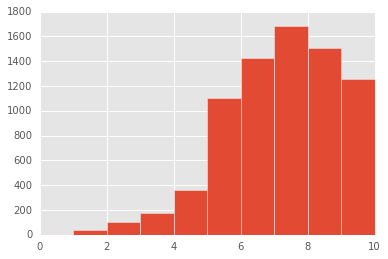

In [112]:
df['amb'].hist()
plt.show()

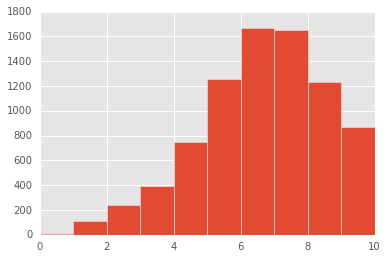

In [113]:
df['attr'].hist()
plt.show()

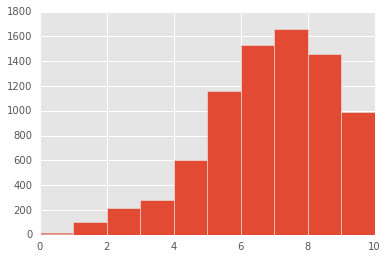

In [114]:
df['fun'].hist()
plt.show()

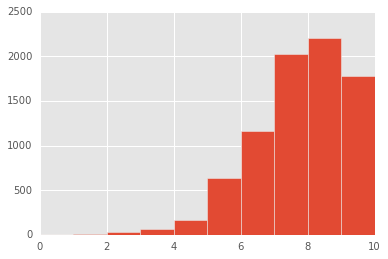

In [115]:
df['intel'].hist()
plt.show()

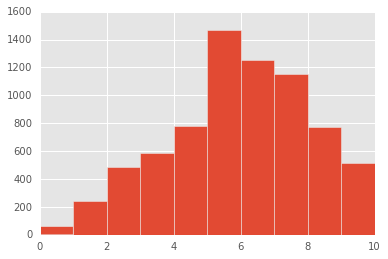

In [116]:
df['shar'].hist()
plt.show()

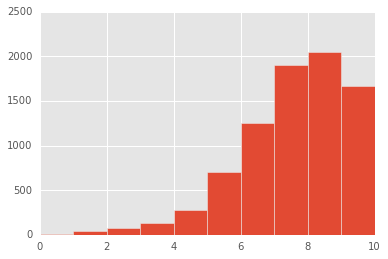

In [117]:
df['sinc'].hist()
plt.show()

Bar plots by gender: 

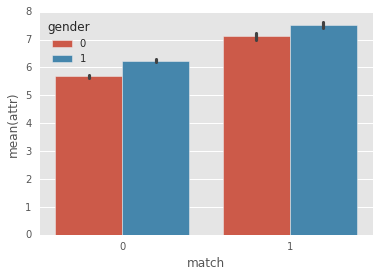

In [267]:
import seaborn as sns
sns.barplot(x="match", y="attr", hue="gender", data=df);

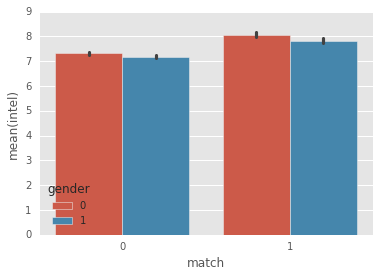

In [268]:
sns.barplot(x="match", y="intel", hue="gender", data=df);

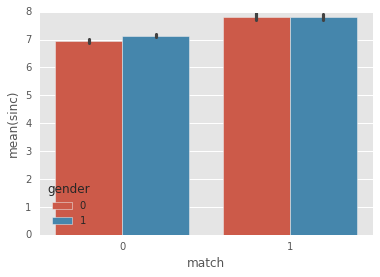

In [269]:
sns.barplot(x="match", y="sinc", hue="gender", data=df);

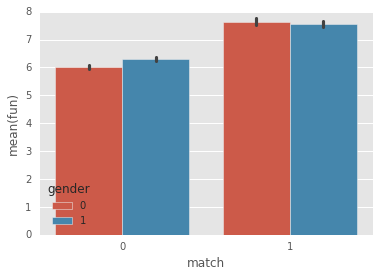

In [270]:
sns.barplot(x="match", y="fun", hue="gender", data=df);

Summary output:

In [301]:
cols_to_keep = ['match', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like']
data = df[cols_to_keep].groupby['gender']
#print data.head()
df['intercept']= 1.0
train_cols = data.columns[1:]


logit = sm.Logit(data['match'], data[train_cols])

# fit the model
result = logit.fit()
print result.summary()

# I haven't been able to get this to run properly, going to keep working on it 


TypeError: 'instancemethod' object has no attribute '__getitem__'

Confidence intervals for each coefficient:

In [300]:
#print result.conf_int()

         0   1
attr   NaN NaN
sinc   NaN NaN
intel  NaN NaN
fun    NaN NaN
amb    NaN NaN
shar   NaN NaN
like   NaN NaN
gender NaN NaN


Odds Ratio:

In [132]:
#print np.exp(result.params)

attr        NaN
sinc        NaN
intel       NaN
fun         NaN
amb         NaN
shar        NaN
like        NaN
match       NaN
gender_1    NaN
intercept   NaN
dtype: float64
